In [6]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
HI_Pipe3D_WISE = fits.open("WISE_Pipe3D_HI_new.fits", memmap=True)
HI_Pipe3D_WISE_table = Table(HI_Pipe3D_WISE[1].data)

In [22]:
MHI_log_initial = numpy.array(HI_Pipe3D_WISE_table['LOGMHI'])  # Stores all data of MHI log(Msun)
SM_log_initial = numpy.array(HI_Pipe3D_WISE_table['log_Mass'])    #SM = Stellar Mass    log(Msun)
W2_initial = numpy.array(HI_Pipe3D_WISE_table['W2'])  # Stores all data of W2
W3_initial = numpy.array(HI_Pipe3D_WISE_table['W3'])  # Stores all data of W3
Flagall = numpy.array(HI_Pipe3D_WISE_table['conflag'])   # All Flag data 
Plateifu_initial = numpy.array(HI_Pipe3D_WISE_table['plateifu_1'])

good = numpy.where((MHI_log_initial > 0) & (Flagall==0))



# Data for positive MHI and confused data
MHI_log = MHI_log_initial[good]                  # HI Mass log(Msun)
SM_log = SM_log_initial[good]                    # Steller Mass log(Msun)
W2 = W2_initial[good]
W3 = W3_initial[good]
Plateifu = Plateifu_initial[good]


MF_log = MHI_log - SM_log                     # Mass Fraction     log(Msun) 
W2diffW3 = W2 - W3

print(len(W2_initial))
print(len(W2))
print(len(W2[numpy.where(W2diffW3 < 2)]))
print(len([x.strip() for x in Plateifu[numpy.where((W2diffW3 < 2) & (MF_log > -0.95))]]))
print([x.strip() for x in Plateifu[numpy.where((W2diffW3 < 2) & (MF_log > -0.95))]])


diff2line = numpy.full(len(W2), 2)


3656
1206
97
48
['7958-3704', '7992-9101', '8439-1902', '8446-3702', '8935-3704', '9183-3702', '9892-3702', '8243-3701', '8554-12704', '8248-3701', '8551-9101', '8717-6101', '8942-6102', '10516-3701', '7957-6102', '7960-3702', '7979-3701', '7993-12704', '8135-6103', '8139-6101', '8145-3702', '8239-3701', '8244-6104', '8248-6104', '8255-1902', '8317-3702', '8322-12705', '8326-3701', '8443-6102', '8446-9101', '8453-3702', '8456-1902', '8458-9102', '8461-1902', '8588-12701', '8626-3701', '8712-12704', '8719-3701', '8939-12703', '8948-12702', '8985-12702', '8989-9101', '8999-6102', '9036-9101', '9095-1902', '9196-12701', '9506-6104', '9864-6101']


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


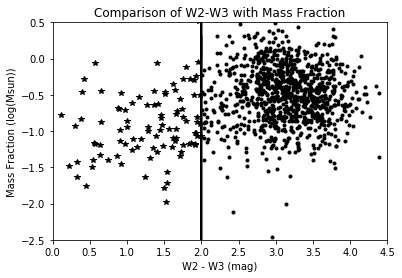

In [10]:
plt.xlabel("W2 - W3 (mag)")
plt.ylabel("Mass Fraction (log(Msun))")
plt.title("Comparison of W2-W3 with Mass Fraction")

plt.plot(W2diffW3[numpy.where(W2diffW3 < 2)], MF_log[numpy.where(W2diffW3 < 2)], "k*") 
plt.plot(W2diffW3[numpy.where(W2diffW3 > 2)], MF_log[numpy.where(W2diffW3 > 2)], "k.") 
plt.plot(diff2line, MF_log, "k-")

plt.xlim(0, 4.5)
plt.ylim(-2.5, 0.5)
plt.show()

In [47]:
print(len(Plateifu[numpy.where(W2diffW3 > 2)].tolist()))

1019


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [38]:
print(Plateifu[numpy.where(W2diffW3 < 2)].tolist())

['7957-12701                      ', '7958-3704                       ', '7992-9101                       ', '8148-6102                       ', '8439-1902                       ', '8446-3702                       ', '8935-3704                       ', '9183-3702                       ', '9892-3702                       ', '8243-3701                       ', '8453-3703                       ', '8483-1902                       ', '8948-6102                       ', '8554-12704                      ', '8248-3701                       ', '8551-9101                       ', '8588-3704                       ', '8717-6101                       ', '8942-6102                       ', '9492-6104                       ', '10001-3704                      ', '10220-9101                      ', '10499-3701                      ', '10499-6102                      ', '10516-3701                      ', '7957-6102                       ', '7960-3702                       ', '7979-3701                 

/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
